In [27]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.tsa.api import VAR
from statsmodels.formula.api import ols
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

np.random.seed(42)

### Analisi Esplorativa dei dati

In [28]:
df = pandas.read_csv('data/sexual_violence_df.csv')

display(df)

,geo,year,sexual_violence,poverty,neet,education,unemployment,income,inequity
0,Austria,2016,50.53,14.964810,8.091438,34.540870,3.828207,24400,4.09
1,Belgium,2016,69.24,25.110680,13.799563,50.108248,5.316225,22267,3.85
2,Bulgaria,2016,7.74,29.330514,16.024476,23.464412,3.648430,3212,7.69
3,Cyprus,2016,2.83,1.917201,1.526974,4.767553,0.729554,14132,4.88
4,Czechia,2016,13.20,13.086765,11.714766,34.405528,2.743999,7905,3.50
...,...,...,...,...,...,...,...,...,...
157,Portugal,2021,26.40,23.068084,9.783339,48.916697,4.531231,11115,5.66
158,Romania,2021,12.21,66.245734,38.979374,44.739872,6.144532,4914,7.14
159,Sweden,2021,217.72,17.852387,6.227577,51.169924,6.746542,25925,4.04
160,Slovenia,2021,21.20,2.783850,1.539553,10.102000,0.653783,15415,3.24


<Axes: >

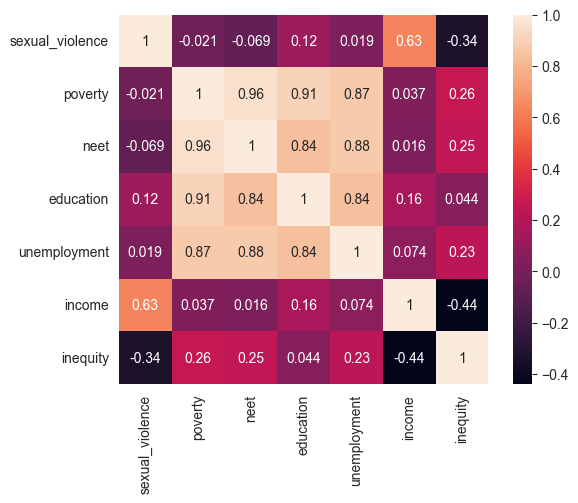

In [29]:
# Correlation Matrix

corrmat = df.drop(columns=["geo", "year"]).corr()

sns.heatmap(corrmat, square=True, annot=True)

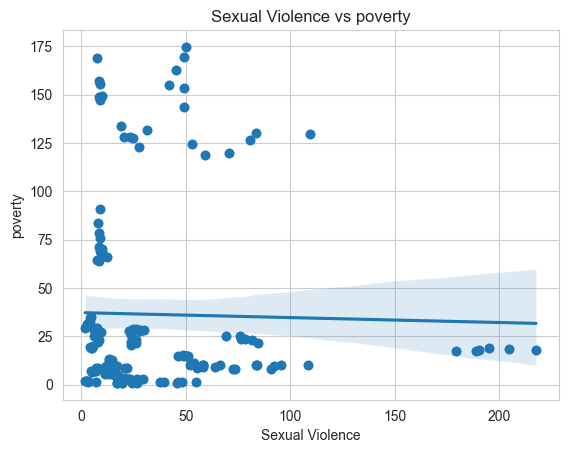

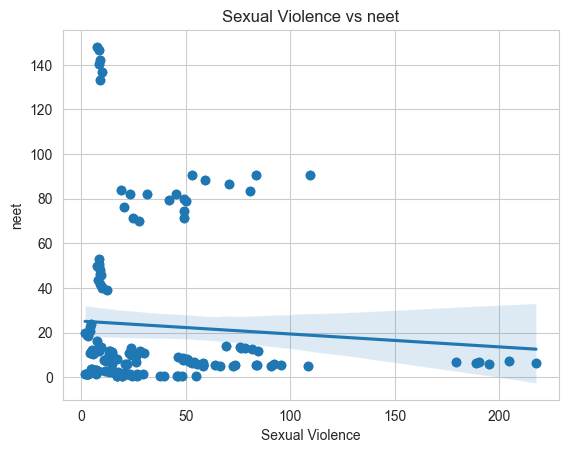

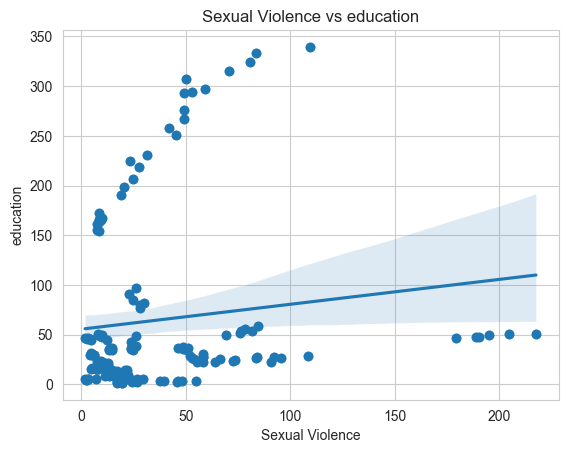

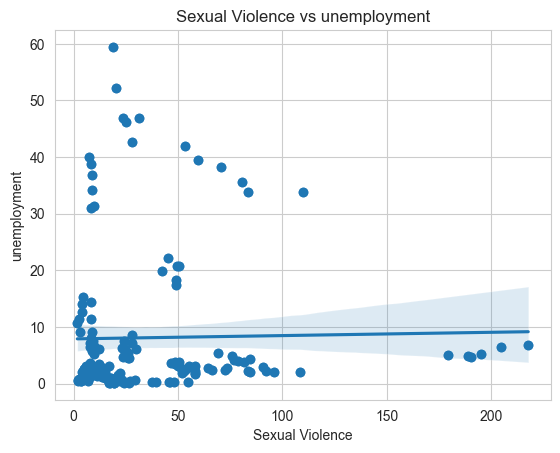

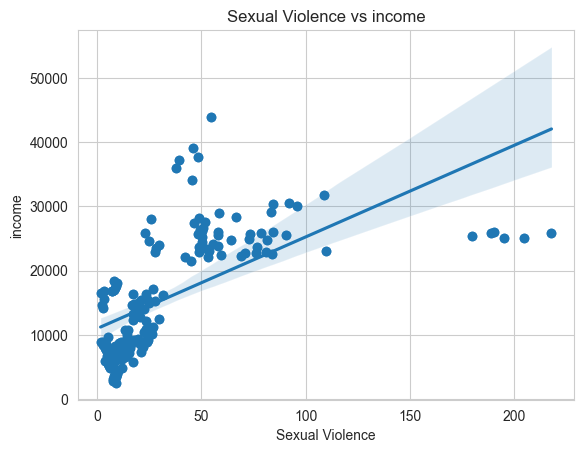

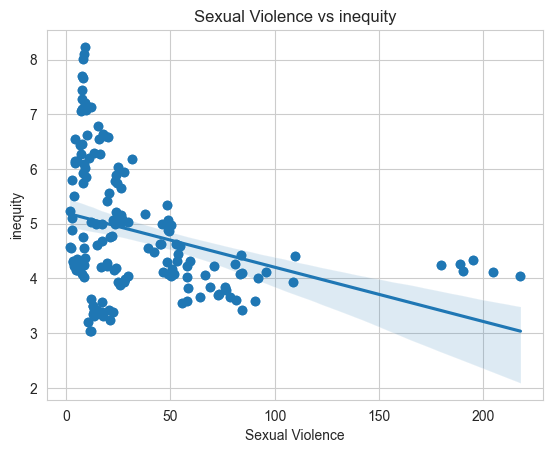

In [30]:
# Scatter Plot
features = ["poverty", "neet", "education", "unemployment", "income", "inequity"]

for feature in features:
    sns.regplot(x="sexual_violence", y=feature, data=df)
    plt.scatter(df["sexual_violence"], df[feature])
    plt.xlabel("Sexual Violence")
    plt.ylabel(feature)
    plt.title("Sexual Violence vs " + feature)
    plt.show()


# Modeling

In [31]:
X = df.drop(columns=["geo", "year", "sexual_violence"])
y = df["sexual_violence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.32923483694430977

In [32]:
# ANOVA Model
model = ols("sexual_violence ~ poverty + neet + education + unemployment + income + inequity", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F        PR(>F)
poverty           11.158996    1.0   0.011413  9.150610e-01
neet            2057.548924    1.0   2.104367  1.488998e-01
education       2438.576325    1.0   2.494065  1.163148e-01
unemployment     194.629548    1.0   0.199058  6.561047e-01
income         67691.194692    1.0  69.231470  4.236467e-14
inequity          36.919398    1.0   0.037759  8.461814e-01
Residual      151551.528736  155.0        NaN           NaN


In [33]:
X2 = sm.add_constant(df.drop(columns=["geo", "year", "sexual_violence"]))
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        sexual_violence   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     19.49
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           7.12e-17
Time:                        16:52:14   Log-Likelihood:                -784.00
No. Observations:                 162   AIC:                             1582.
Df Residuals:                     155   BIC:                             1604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1874     15.586     -0.205   

In [34]:
hypothesis_0 = "poverty = 0, neet = 0, education = 0, unemployment = 0, income = 0, inequity = 0"
print(results.wald_test(hypothesis_0))


<F test: F=array([[19.49377275]]), p=7.115089866722736e-17, df_denom=155, df_num=6>


C:\Workspace\test\venv\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


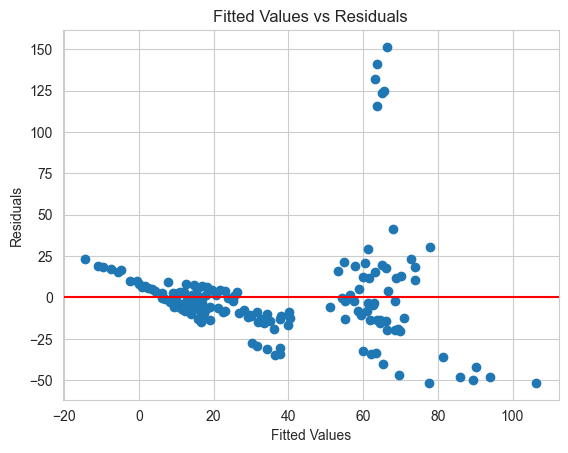

In [35]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals")
plt.axhline(y=0, color="red")
plt.show()

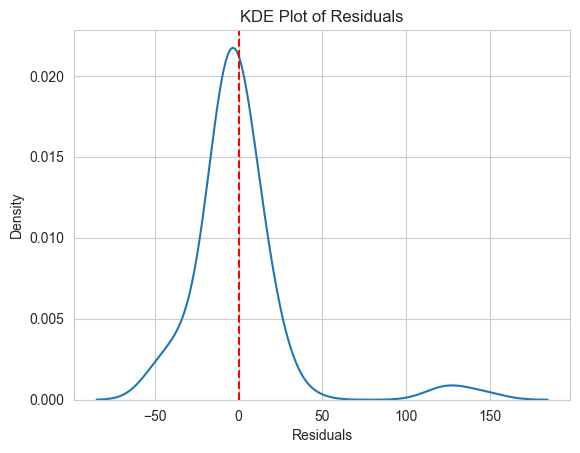

In [36]:
# KDE Plot of residuals
sns.kdeplot(results.resid)
plt.axvline(results.resid.mean(), linestyle='dashed', color="red")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("KDE Plot of Residuals")
plt.show()

In [37]:
#sm.graphics.plot_partregress_grid(results)

### Top 5 regions with the highest Sexual Violence in total

In [38]:
data = df.drop(columns=["poverty", "neet", "education", "unemployment", "income", "inequity"])
display(data.groupby("geo").sum().sort_values(by="sexual_violence", ascending=False).head(5))

,year,sexual_violence
geo,,
Sweden,12111,1176.30
Denmark,12111,530.84
Belgium,12111,466.43
France,12111,457.76
Finland,12111,414.56


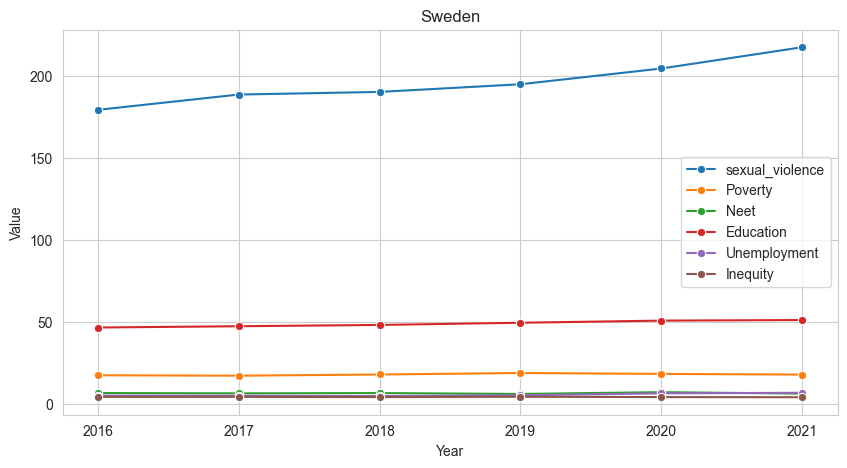

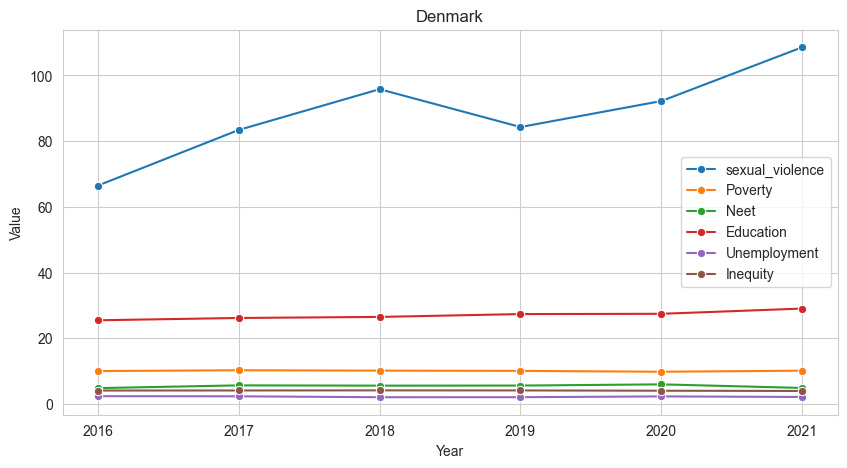

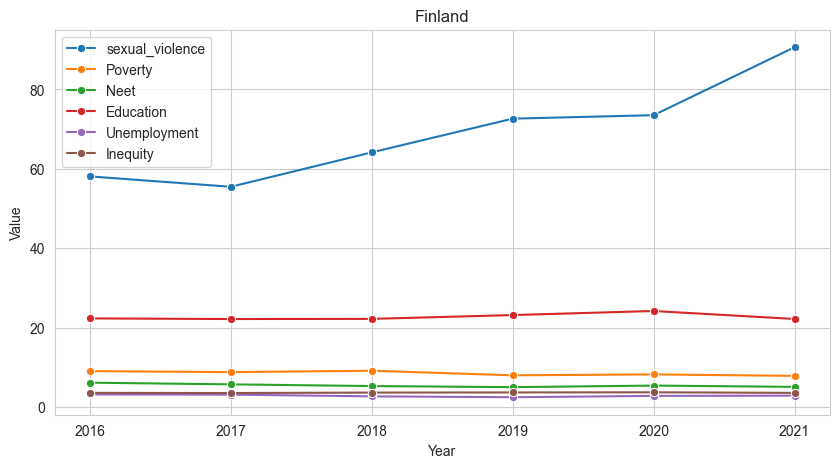

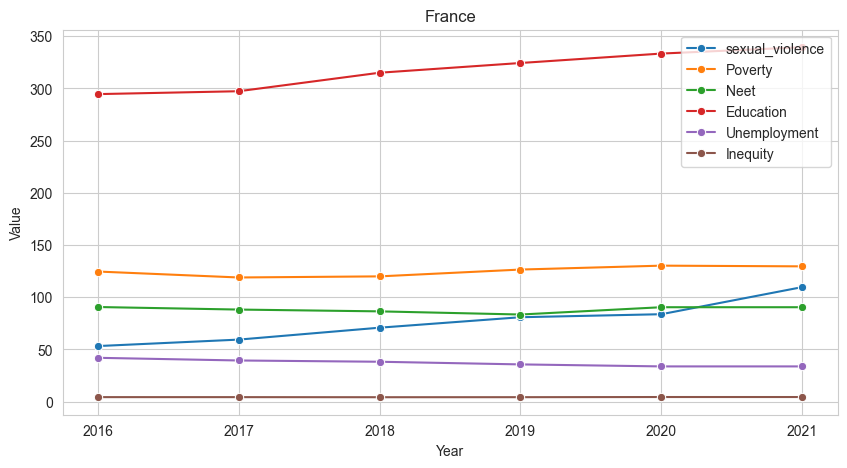

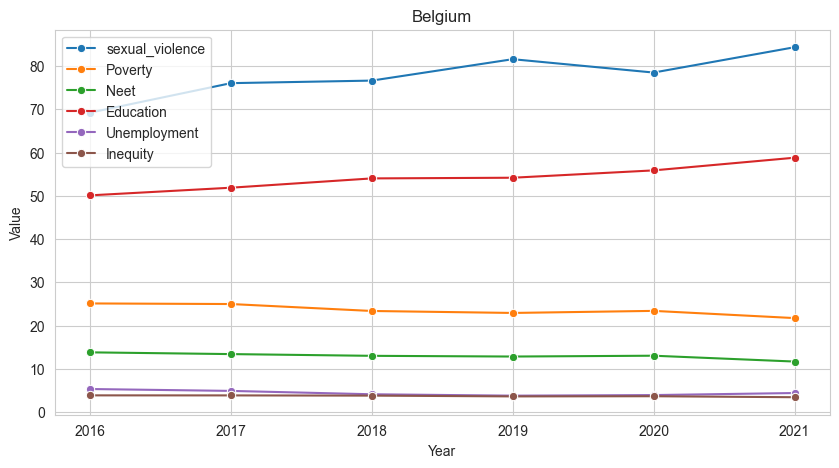

In [39]:
# Data Visualization

sweden = df[df["geo"] == "Sweden"]
denmark = df[df["geo"] == "Denmark"]
belgium = df[df["geo"] == "Belgium"]
france = df[df["geo"] == "France"]
finland = df[df["geo"] == "Finland"]


countries = [sweden, denmark, belgium, france, finland]

for country in countries:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="year", y="sexual_violence", data=country, label="sexual_violence", marker="o")
    sns.lineplot(x="year", y="poverty", data=country, label="Poverty", marker="o")
    sns.lineplot(x="year", y="neet", data=country, label="Neet", marker="o")
    sns.lineplot(x="year", y="education", data=country, label="Education", marker="o")
    sns.lineplot(x="year", y="unemployment", data=country, label="Unemployment", marker="o")
#    sns.lineplot(x="year", y="income", data=country, label="Income", marker="o")
    sns.lineplot(x="year", y="inequity", data=country, label="Inequity", marker="o")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(country["geo"].iloc[0])
    plt.show()